<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [2]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

Load the dataset into a dataframe.


In [3]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


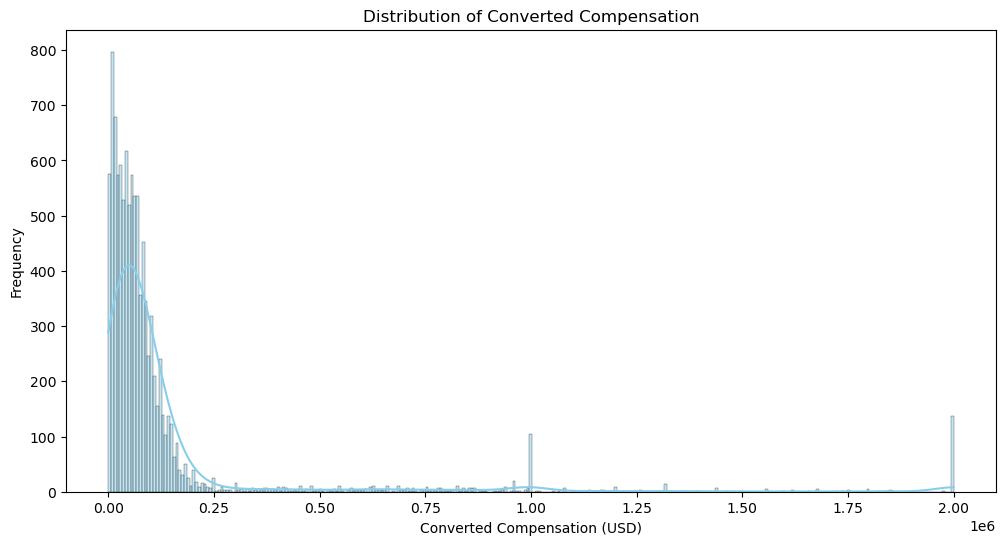

In [4]:
# your code goes here
df_cleaned = df.dropna(subset=['ConvertedComp'])

# Plot the distribution curve using seaborn
plt.figure(figsize=(12, 6))
sns.histplot(df_cleaned['ConvertedComp'], kde=True, color='skyblue')

# Set labels and title
plt.xlabel('Converted Compensation (USD)')
plt.ylabel('Frequency')
plt.title('Distribution of Converted Compensation')

# Show the plot
plt.show()

Plot the histogram for the column `ConvertedComp`.


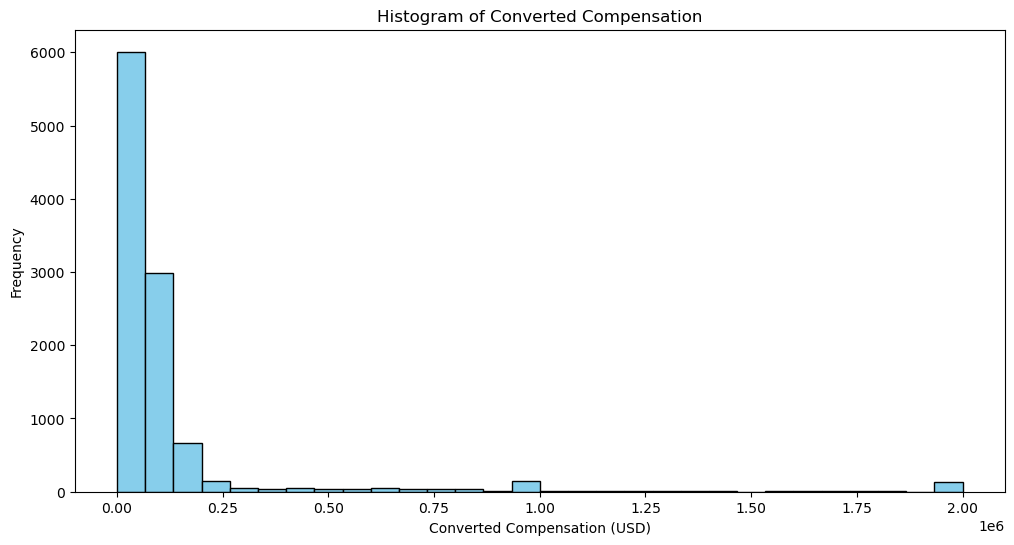

In [5]:
# your code goes here
# Plot the histogram
plt.figure(figsize=(12, 6))
plt.hist(df_cleaned['ConvertedComp'], bins=30, color='skyblue', edgecolor='black')

# Set labels and title
plt.xlabel('Converted Compensation (USD)')
plt.ylabel('Frequency')
plt.title('Histogram of Converted Compensation')

# Show the plot
plt.show()

What is the median of the column `ConvertedComp`?


In [6]:
# your code goes here
# Calculate the median of the ConvertedComp column
median_salary = df_cleaned['ConvertedComp'].median()

print("Median Converted Compensation:", median_salary)

Median Converted Compensation: 57745.0


How many responders identified themselves only as a **Man**?


In [7]:
# your code goes here
# Filter the DataFrame for responders who identified themselves as 'Man'
male_responders = df[df['Gender'] == 'Man']

# Print the count of responders who identified only as 'Man'
count_only_man = male_responders['Gender'].count()
print("Number of responders identifying only as Man:", count_only_man)

Number of responders identifying only as Man: 10480


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [8]:
# your code goes here
# Filter the DataFrame for responders who identified themselves as 'Woman'
female_responders = df[df['Gender'] == 'Woman']

# Remove any rows where ConvertedComp is null or NaN for accurate calculation
female_responders_cleaned = female_responders.dropna(subset=['ConvertedComp'])

# Calculate the median of the ConvertedComp column for female responders
median_salary_woman = female_responders_cleaned['ConvertedComp'].median()

print("Median Converted Compensation for responders identifying only as Woman:", median_salary_woman)

Median Converted Compensation for responders identifying only as Woman: 57708.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [9]:
# your code goes here
# Remove any rows where Age is null or NaN for accurate calculation
df_cleaned_age = df.dropna(subset=['Age'])

# Calculate the five-number summary for the Age column
five_number_summary_age = df_cleaned_age['Age'].describe(percentiles=[.25, .5, .75])

print("Five Number Summary for Age:")
print(five_number_summary_age[['min', '25%', '50%', '75%', 'max']])

Five Number Summary for Age:
min    16.0
25%    25.0
50%    29.0
75%    35.0
max    99.0
Name: Age, dtype: float64


Plot a histogram of the column `Age`.


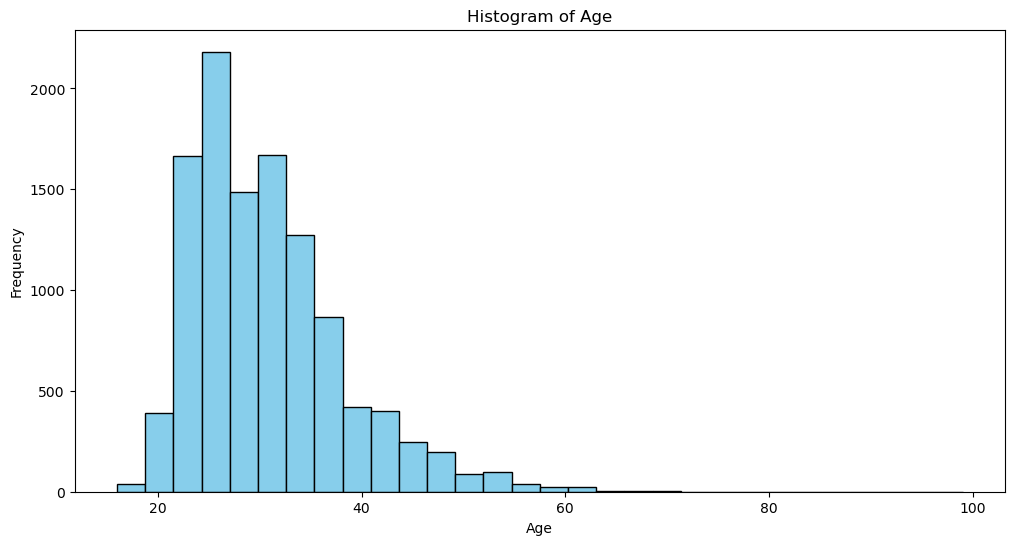

In [10]:
# your code goes here
# Plot the histogram
plt.figure(figsize=(12, 6))
plt.hist(df_cleaned_age['Age'], bins=30, color='skyblue', edgecolor='black')

# Set labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')

# Show the plot
plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


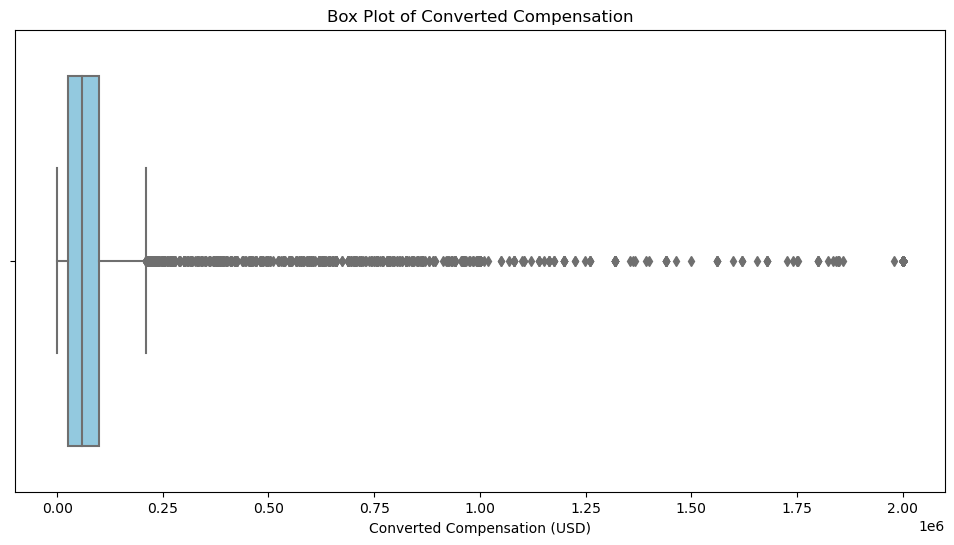

In [11]:
# your code goes here
# Remove any rows where ConvertedComp is null or NaN for accurate visualization
df_cleaned_comp = df.dropna(subset=['ConvertedComp'])

# Create a box plot for ConvertedComp to identify outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x='ConvertedComp', data=df_cleaned_comp, color='skyblue')

# Set labels and title
plt.xlabel('Converted Compensation (USD)')
plt.title('Box Plot of Converted Compensation')

# Show the plot
plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [12]:
# your code goes here
# Calculate the first quartile (Q1) and third quartile (Q3)
q1 = df_cleaned_comp['ConvertedComp'].quantile(0.25)
q3 = df_cleaned_comp['ConvertedComp'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
iqr = q3 - q1

print("Interquartile Range (IQR) for ConvertedComp:", iqr)

Interquartile Range (IQR) for ConvertedComp: 73132.0


Find out the upper and lower bounds.


In [13]:
# your code goes here
# Define the lower and upper bounds for outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

print("Lower Bound for ConvertedComp:", lower_bound)
print("Upper Bound for ConvertedComp:", upper_bound)

Lower Bound for ConvertedComp: -82830.0
Upper Bound for ConvertedComp: 209698.0


Identify how many outliers are there in the `ConvertedComp` column.


In [14]:
# your code goes here
# Define the lower and upper bounds for outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Identify outliers
outliers = df_cleaned_comp[(df_cleaned_comp['ConvertedComp'] < lower_bound) | (df_cleaned_comp['ConvertedComp'] > upper_bound)]

# Count the number of outliers
num_outliers = len(outliers)

print("Number of outliers in ConvertedComp:", num_outliers)

Number of outliers in ConvertedComp: 879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [15]:
# your code goes here
# Create a new DataFrame by removing outliers
df_no_outliers = df_cleaned_comp[(df_cleaned_comp['ConvertedComp'] >= lower_bound) & (df_cleaned_comp['ConvertedComp'] <= upper_bound)]

# Print the shape of the original and new DataFrames
print("Original DataFrame shape:", df_cleaned_comp.shape)
print("DataFrame without outliers shape:", df_no_outliers.shape)

Original DataFrame shape: (10582, 85)
DataFrame without outliers shape: (9703, 85)


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [16]:
# your code goes here
# Remove any rows where Age is null or NaN for accurate correlation calculation
df_cleaned_age = df.dropna(subset=['Age'])

# Calculate the correlation matrix
correlation_matrix = df_cleaned_age.corr()

# Extract the correlation of Age with all other numerical columns
age_correlation = correlation_matrix['Age']

# Print the correlation values
print("Correlation between Age and other numerical columns:")
print(age_correlation)

Correlation between Age and other numerical columns:
Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
Name: Age, dtype: float64


C:\Users\macma\AppData\Local\Temp\ipykernel_19008\1031514084.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_cleaned_age.corr()


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
